In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
uber = pd.read_csv("D:\\uber-raw-data-apr14.csv\\uber-raw-data-apr14.csv")

In [74]:
uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [75]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [76]:
def num_missing(x):
    return sum(x.isnull())
print('Number of Missing Columns or a null value:')
print(uber.apply(num_missing, axis=0))

Number of Missing Columns or a null value:
Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64


In [77]:
uber.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [106]:
uber['Date/Time'] = pd.to_datetime(uber['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber['DayofWeekNum'] = uber['Date/Time'].dt.dayofweek
uber['Weekday'] = uber['Date/Time'].dt.day_name()
uber['DayNum'] = uber['Date/Time'].dt.day
uber['HourofDay'] = uber['Date/Time'].dt.hour

In [107]:
uber.head()

,Date/Time,Lat,Lon,Base,DayofWeekNum,DayNum,HourOfDay,Weekday,HourofDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0,Tuesday,0


In [108]:
uber.shape

(564516, 9)

In [109]:
uber['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

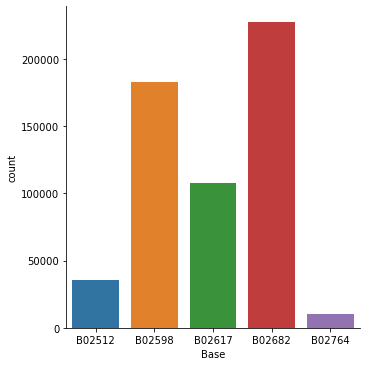

In [110]:
sns.catplot(x='Base', data=uber, kind='count')

In [111]:
uber_week_data = uber.pivot_table(index=['DayofWeekNum','Weekday'], values='Base' ,aggfunc='count')
uber_week_data

,,Base
DayofWeekNum,Weekday,
0,Monday,60861
1,Tuesday,91185
2,Wednesday,108631
3,Thursday,85067
4,Friday,90303
5,Saturday,77218
6,Sunday,51251


<AxesSubplot:xlabel='DayofWeekNum,Weekday'>

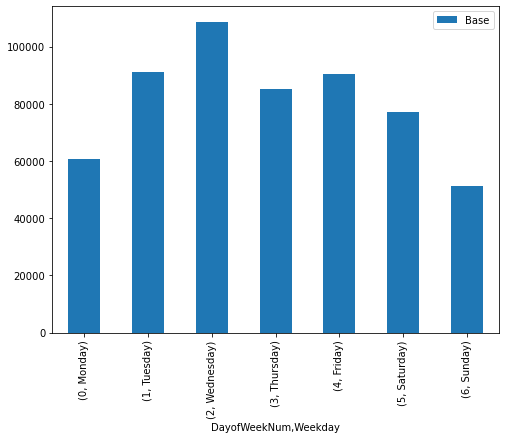

In [112]:
uber_week_data.plot(kind='bar',figsize=(8,6))

<AxesSubplot:title={'center':'Hour Journeys'}, xlabel='HourofDay'>

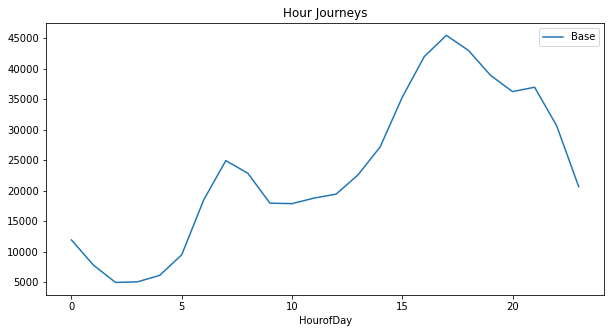

In [118]:
uber_hourly_data = uber.pivot_table(index=['HourofDay'], values='Base' ,aggfunc='count')
uber_hourly_data.plot(kind='line',figsize=(10,5),title='Hour Journeys')

<AxesSubplot:title={'center':'Journeys by DayNum'}, xlabel='DayNum'>

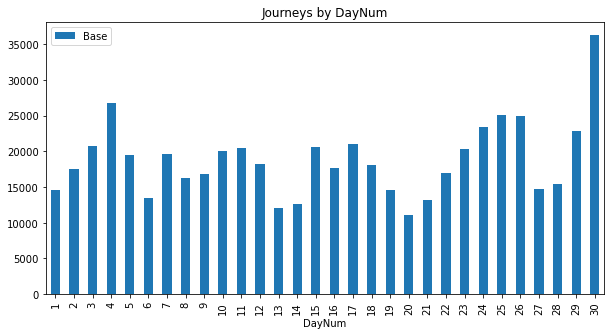

In [120]:
uber_hourly_data = uber.pivot_table(index=['DayNum'], values='Base' ,aggfunc='count')
uber_hourly_data.plot(kind='bar',figsize=(10,5),title='Journeys by DayNum')

In [124]:
def count_rows(rows):
    return len(rows)

by_date = uber.groupby('DayNum').apply(count_rows)
by_date

DayNum
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [131]:
by_date_sorted = by_date.sort_values()
by_date_sorted

DayNum
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

<AxesSubplot:title={'center':'Hour of Day'}, ylabel='Frequency'>

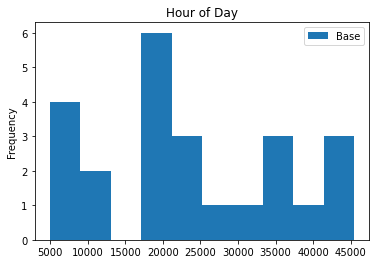

In [143]:
uber_hourly_data = uber.pivot_table(index=['HourofDay'], values='Base' ,aggfunc='count')
uber_hourly_data.plot(kind='hist',title='Hour of Day')

<AxesSubplot:title={'center':'Hour Journeys'}, ylabel='Frequency'>

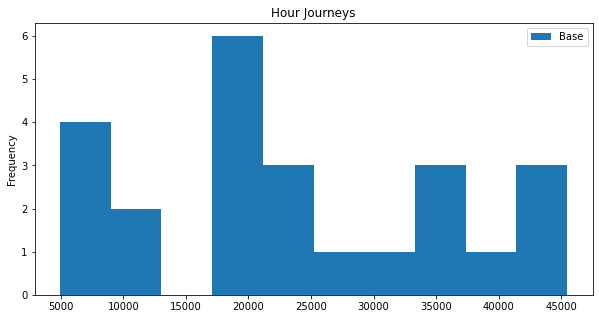

In [160]:
uber_hourly_data = uber.pivot_table(index=['HourofDay'], values='Base' ,aggfunc='count')
uber_hourly_data.plot(kind='hist',figsize=(10,5),title='Hour Journeys')

In [166]:
count_rows(uber)
by_hour_weekday = uber.groupby('HourofDay DayofWeekNum'.split()).apply(count_rows).unstack()
by_hour_weekday

DayofWeekNum,0,1,2,3,4,5,6
HourofDay,,,,,,,
0,518,765,899,792,1367,3027,4542
1,261,367,507,459,760,2479,2936
2,238,304,371,342,513,1577,1590
3,571,516,585,567,736,1013,1052
4,1021,887,1003,861,932,706,685
5,1619,1734,1990,1454,1382,704,593
6,2974,3766,4230,3179,2836,844,669
7,3888,5304,5647,4159,3943,1110,873
8,3138,4594,5242,3616,3648,1372,1233


<AxesSubplot:xlabel='DayofWeekNum', ylabel='HourofDay'>

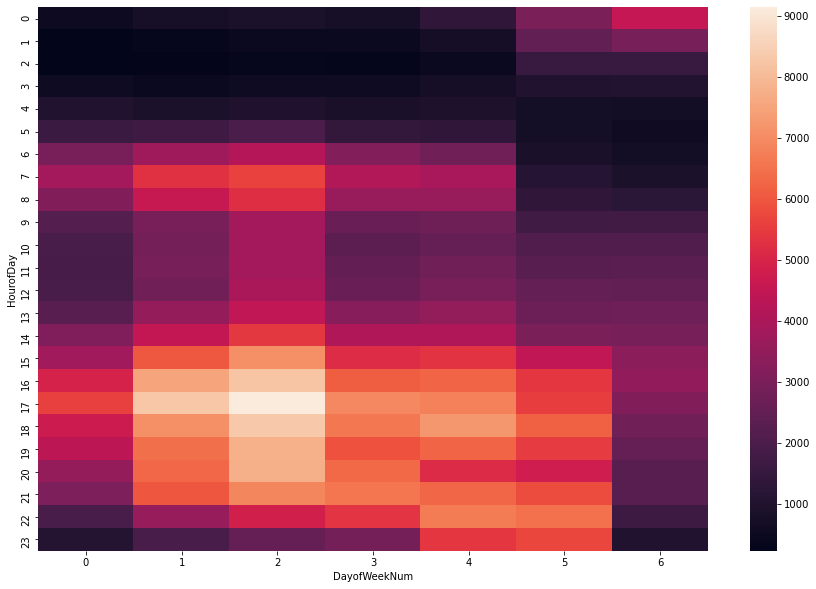

In [167]:
plt.figure(figsize=(15,10))
sns.heatmap(by_hour_weekday)